In [1]:
import sys
import os
import json
from visualization import *

In [2]:
sys.path.append('Markov/')

In [3]:
from markovchain import *

In [4]:
data_path="Data/dataset.json"

In [5]:
with open(data_path, "r") as f:
    training_data=json.load(f)
print(len(training_data))

430


In [6]:
states=extract_states(training_data)
model=MarkovChainMelodyGenerator(states)
model.train(training_data)
print(len(states))

138


In [7]:
generated_melody = model.generate(100)

In [8]:
generated_melody_string=generated_to_string(generated_melody)
print(generated_melody_string)

D5-0.25, C5-0.25, F4-0.5, F4-0.25, G4-0.25, B4-0.25, C#5-1.0, F#3-0.25, C#5-0.25, F#5-0.25, E5-0.25, D#5-0.25, D5-0.25, G5-0.5, A5-0.25, A-5-0.25, B-5-0.25, D6-0.25, B4-0.25, G#4-0.25, A4-0.25, C5-0.5, B-4-0.5, B-4-0.25, A4-0.25, C5-0.25, C5-0.25, F#5-0.25, A#4-0.25, C#5-0.25, F5-0.25, E5-0.25, C#5-0.25, D5-0.25, A4-0.25, G4-0.25, E4-0.25, D4-0.25, D4-0.5, B3-0.5, B3-1.0, B4-0.5, A4-0.25, C5-0.25, B-4-0.25, A4-0.25, B-4-0.25, G4-0.25, A4-0.25, G4-0.25, C5-0.25, D#4-0.5, D#4-0.25, E4-0.5, F5-0.25, C#5-0.25, D5-0.25, E5-0.25, C6-0.25, G5-0.25, A5-0.25, E6-0.5, C#6-0.25, C#6-0.5, B5-0.25, B5-0.5, A#5-0.25, B5-0.25, C6-0.25, B-5-0.25, B-5-0.25, A5-0.25, F5-0.25, F5-0.5, G4-0.25, A4-0.25, B-4-0.25, B-4-0.5, G4-0.5, F#4-0.25, A4-0.25, B-4-0.25, E-5-0.25, C4-1.0, D5-1.0, B-4-0.5, F#4-1.0, F#4-0.5, A4-0.25, B-4-0.25, D5-0.25, A4-0.25, D4-0.25, E-4-0.25, D5-0.25, F4-0.25, A4-0.25, A#4-0.25, C#5-0.25, B4-0.5


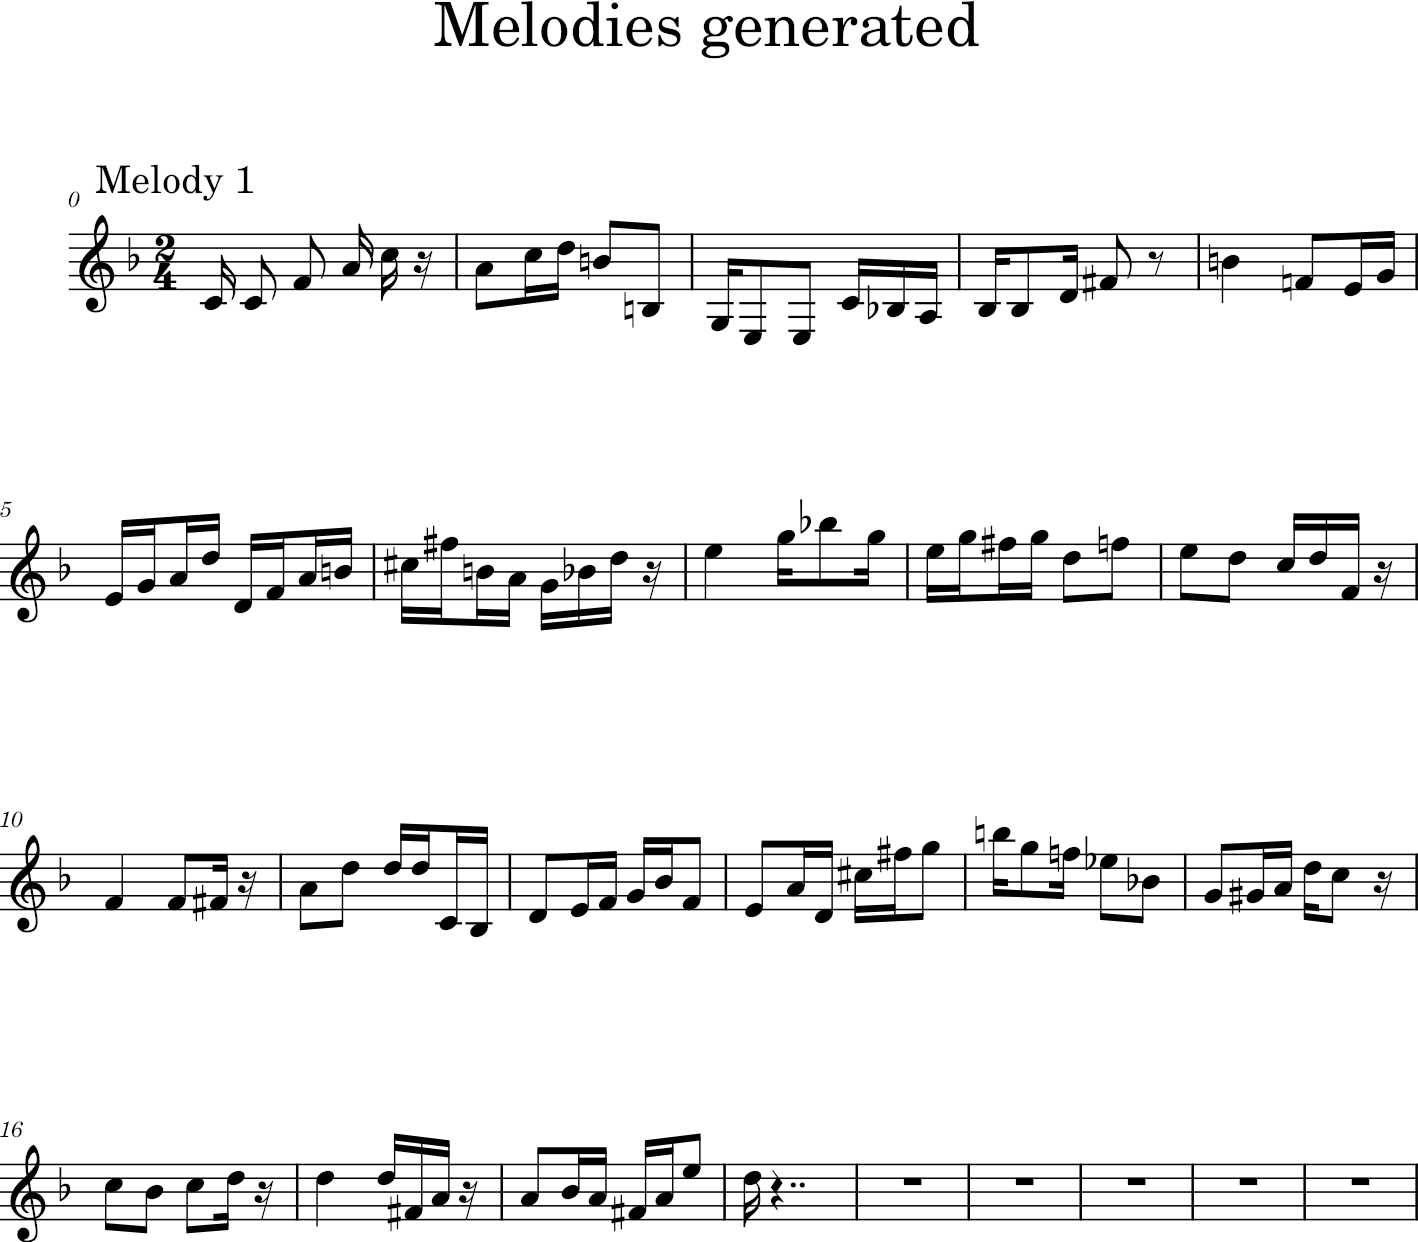

In [16]:
visualize("2/4",["F"],[generated_melody_string]).show()

In [17]:
#Folk (Windows)
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
visualize("2/4",["E"],[generated_melody_string]).show("musicxml")

In [10]:
title="Markov_1"
generated_melodies=[model.generate(60) for _ in range(40)]
generated_to_json(title,generated_melodies,key="F",part="All")